<a href="https://colab.research.google.com/github/miinjoo/Naming-Front/blob/main/hw2_face_detection_1971100_%EA%B9%80%EB%AF%BC%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **과제2. Face detection**

사이버보안학과 1971100 김민주

In [1]:
%cd
!git clone https://github.com/ageitgey/face_recognition.git
!ls face_recognition/

/root
Cloning into 'face_recognition'...
remote: Enumerating objects: 1028, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 1028 (delta 5), reused 6 (delta 1), pack-reused 1014
Receiving objects: 100% (1028/1028), 101.51 MiB | 24.64 MiB/s, done.
Resolving deltas: 100% (586/586), done.
AUTHORS.rst	    HISTORY.rst		README_Simplified_Chinese.md
CONTRIBUTING.rst    LICENSE		requirements_dev.txt
docker		    Makefile		requirements_docs.txt
docker-compose.yml  MANIFEST.in		requirements.txt
Dockerfile	    pyproject.toml	setup.cfg
Dockerfile.gpu	    README_Japanese.md	setup.py
docs		    README_Korean.md	tests
examples	    README.md		tox.ini
face_recognition    README.rst


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import face_recognition
import matplotlib as mpl


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install numpy pandas opencv-python face-recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=5a1c4f1911ac54187775c450d9a6166c91de8b2f893601ab3c3638010541a7d0
  Stored in directory: /root/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models


### face detection 구현하기

In [5]:
img_bgr = cv2.imread('/content/drive/MyDrive/test/01-1.jpg')
img_bgr = cv2.resize(img_bgr, (400, 600))
img_show = img_bgr.copy()



*   과제1에서 제출한 사진을 이용



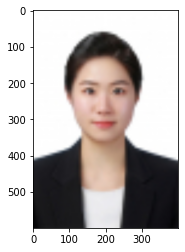

In [6]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

In [10]:
img_bgr[:3, :3]

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]]], dtype=uint8)

In [11]:
img_bgr[200, 200]

array([171, 187, 222], dtype=uint8)

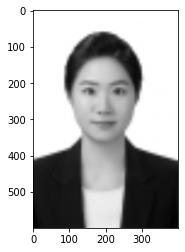

In [12]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

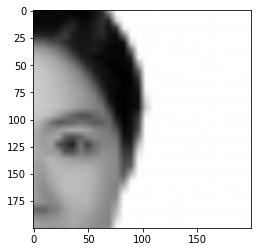

In [13]:
img_gray[:3, :3]
img_gray[200, 200]
plt.imshow(img_gray[100:300, 200:400], cmap='gray')

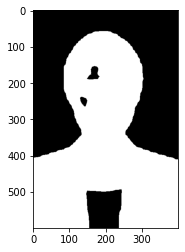

In [14]:
img_zero = np.zeros((600, 400), dtype=np.uint8) # char
img_zero[img_gray >215] = 255
img_src = 255 - img_zero
plt.imshow(img_src, cmap='gray')

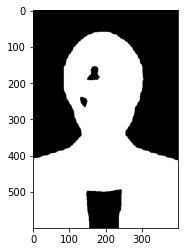

In [15]:
img_erode = cv2.erode(img_src, (10, 10))
img_erode = cv2.erode(img_erode, (10, 10))
plt.imshow(img_erode, cmap='gray')

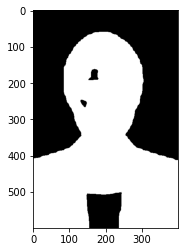

In [16]:
img_dil = cv2.dilate(img_erode, (10, 10), iterations=8)
# img_dil = cv2.dilate(img_dil, (10, 10))

plt.imshow(img_dil, cmap='gray')

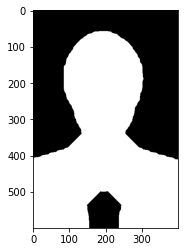

In [17]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
img_morph = cv2.morphologyEx(img_src, cv2.MORPH_OPEN, kernel, iterations=1)
img_morph = cv2.morphologyEx(img_morph, cv2.MORPH_CLOSE, kernel, iterations=37)

plt.imshow(img_morph, cmap='gray')



*   영상처리를 이용해서 얼굴 영역 분할





> ##### 얼굴 영역 mask 결과 이미지
  생각한 얼굴 영역 완전한 분리 실패 원인:  
  증명사진 사용으로 인해 주변 배경이 없는 하얀 바탕이다. 또한 옷도 하얀색이며 얼굴 부분도 보정으로 하얗게 된 부분이 있기 때문에 그러한 부분이 제대로 분리되지 않은 것 같다.






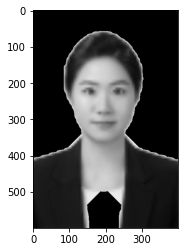

In [18]:
img_threshold = np.zeros_like(img_gray)
# img_threshold[img_morph == 255] = img_gray
img_threshold = np.where(img_morph == 255, img_gray, 0)

plt.imshow(img_threshold, cmap='gray')

In [19]:
!pip install dlib
import dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
detector_hog = dlib.get_frontal_face_detector() # detector 선언

In [21]:
#img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_threshold, 1) # (image, num of img pyramid)

*   분할된 얼굴 영역을 포함하는 사각형 박스(bounding box) 좌표



In [22]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_threshold, (l,t), (r,b), 
									(0,0,255), 2, lineType=cv2.LINE_AA)
    print('분할된 얼굴 영역을 포함하는 사각형 박스(bounding box) 좌표: ')
    print((l,t), (r,b), (l,b),(r,t))

분할된 얼굴 영역을 포함하는 사각형 박스(bounding box) 좌표: 
(97, 180) (283, 366) (97, 366) (283, 180)


*   최종이미지  
얼굴 영역은 mask 로 표현하고 사각형 박스는 cv2.rectangle() 을 이용해서 이미지에 그리기


> 얼굴부분에 사각형이 생긴 것을 확인할 수 있다. 빨간색 사각형이 생기게 하였으나 파란색에 가까운 색의 사각형으로 얼굴 영역에 생겼다.



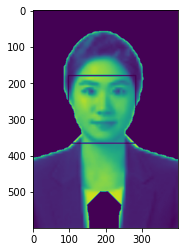

In [23]:
plt.imshow(img_threshold)
plt.show()

## 4주차에 배운 face detection 과 face recognition 직접 실행하기

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'face_recognition' already exists and is not an empty directory.


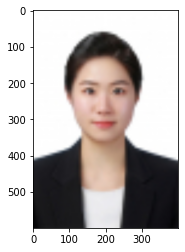

In [24]:
!pip install numpy pandas opencv-python face-recognition
!git clone https://github.com/ageitgey/face_recognition.git

import cv2
import face_recognition
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/test/01-1.jpg')
img = cv2.resize(img, (400, 600))
#cv2.imshow(img)
cv2.waitKey()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

*   과제1에서 제출한 사진을 이용할 것 + 추가로 과제 수행하는 날짜의 사진을 촬영할 것



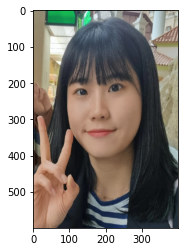

In [25]:
img_test = cv2.imread('/content/drive/MyDrive/test/0328.jpg')
img_test = cv2.resize(img_test, (400, 600))
cv2.waitKey()
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))

**과제1에서 제출한 사진 locations**

In [26]:
locations = face_recognition.face_locations(img)
print(locations)


AttributeError: ignored

**과제 수행하는 날짜 촬영한 사진 locations**

In [28]:
locations_test = face_recognition.face_locations(img_test)
print(locations_test)

AttributeError: ignored

**과제1에서 제출한 사진 encodings**

In [27]:
encodings = face_recognition.face_encodings(img, locations)
print(encodings)
print(len(encodings[0]))

AttributeError: ignored

**과제 수행하는 날짜 촬영한 사진 encodings**


In [28]:
encodings_test = face_recognition.face_encodings(img_test, locations)
print(encodings_test)
print(len(encodings_test[0]))

AttributeError: ignored

In [29]:
import os
from os.path import join
from glob import glob
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
from tqdm.notebook import tqdm

def show(img_bgr):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

lfw_dir = '/content/drive/MyDrive/test/*.jpg'

list_jpg = sorted(glob(join(lfw_dir, '*.jpg')))
list_img = []

for jpg_path in tqdm(lfw_dir):
    list_img.append(cv2.imread(jpg_path, 1))
np_imgs = np.array(list_img)
print(np_imgs.shape)

  0%|          | 0/33 [00:00<?, ?it/s]

(33,)


In [30]:
# my image
face_path = sorted(glob('/content/drive/MyDrive/test/*.jpg'))
list_img_user = [cv2.resize(cv2.imread(p), None, fx=0.5, fy=0.5) for p in face_path]
for img in list_img_user:
    print(img.shape)
    
np_embs_user = np.zeros((len(list_img_user), 128))

for idx, img in enumerate(tqdm(list_img_user)):
    locations = face_recognition.face_locations(img)
    encodings = face_recognition.face_encodings(img, locations)
    if len(encodings) > 0:
        np_embs_user[idx] = encodings[0]
    else:
        print(idx, 'no face')

(45, 30, 3)
(1007, 756, 3)


  0%|          | 0/2 [00:00<?, ?it/s]

AttributeError: ignored

In [31]:
np_embs = np.zeros((len(list_img), 128))

# 0번 이미지와 lfw db 의 거리 계산
np_dist_user_db = np.linalg.norm(np_embs_user[0] - np_embs, axis=1)

# 0번 이미지와 user 이미지 전체의 거리 계산
np_dist_user_user = np.linalg.norm(np_embs_user[0] - np_embs_user, axis=1)

# lfw db 1번 이미지와 전체 db의 거리 계산
np_dist_db_db = np.linalg.norm(np_embs[1] - np_embs, axis=1)


In [32]:
print(np_dist_db_db)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]




*   실행시간 비교

> dlib detector 이용한 실행결과





In [33]:
%%time
for idx, e in enumerate(np_embs_user):
    dists = np.linalg.norm(e - np_embs, axis=1)


CPU times: user 938 µs, sys: 0 ns, total: 938 µs
Wall time: 952 µs
